In [78]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')
import glob
import os
import datetime

%matplotlib inline

run_date = datetime.date.today().strftime("%Y-%m-%d")
yesterday = (datetime.date.today() - datetime.timedelta(1)).strftime("%Y-%m-%d")

In [79]:
import matplotlib.style as style
style.use('fivethirtyeight')

In [80]:
# load data
all_files = glob.glob('*.csv')
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col = None, header = 0)
    li.append(df)

jobs_df = pd.concat(li, axis = 0, ignore_index = True)

In [81]:
# Clean up data
jobs_df['run_date'] = pd.to_datetime(jobs_df['run_date'])

# Compare Today and Yesterday

In [82]:
# Get dataframes for today and yesterday
today_posts = jobs_df.loc[jobs_df['run_date'] == run_date]
yesterday_posts = jobs_df.loc[jobs_df['run_date'] == yesterday]

print(f'There were {today_posts.shape[0]} posts today and {yesterday_posts.shape[0]} posts yesterday')

There were 75 posts today and 74 posts yesterday


## Jobs that are no longer posted

In [83]:
old_posts = set(yesterday_posts.job_id) - set(today_posts.job_id)
print(f'There are {len(old_posts)} job postings that were up on {yesterday} but no longer exist on {run_date}:')
if len(old_posts) > 0:
    display(today_posts.loc[today_posts.job_id.isin(old_posts)])

There are 0 job postings that were up on 2019-11-19 but no longer exist on 2019-11-20:


## New jobs as of today

In [84]:
new_posts = set(today_posts.job_id) - set(yesterday_posts.job_id)
print(f'There are {len(new_posts)} new job postings for {run_date}:')
if len(new_posts) > 0:
    display(today_posts.loc[today_posts.job_id.isin(new_posts)])

There are 1 new job postings for 2019-11-20:


,category,job_title,page_link,job_id,location,run_date
167,Digital,Media Producer,https://boards.greenhouse.io/bernie2020/jobs/4...,4529344002,Washington D.C.,2019-11-20


In [85]:
# Get Count of all jobs by date
run_date_counts = jobs_df.groupby('run_date').count()[['job_id']]
run_date_counts

,job_id
run_date,
2019-11-14,51
2019-11-15,67
2019-11-16,68
2019-11-17,65
2019-11-18,72
2019-11-19,74
2019-11-20,75


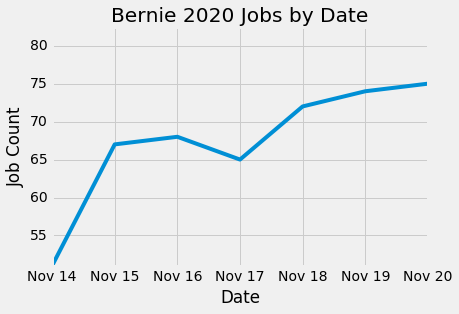

In [117]:
import matplotlib.dates as mdates
x = run_date_counts.index
y = run_date_counts['job_id']
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.plot(x,y)
plt.xlabel('Date')
plt.ylabel('Job Count')
plt.ylim(min(y), max(y) * 1.1)
plt.title('Bernie 2020 Jobs by Date')

# Save char
plt.savefig(run_date + '_JobsByDate.png', bbox_inches = 'tight')
plt.show()


In [112]:
max(y) * 0.2

15.0